In [1]:
#load packages
import numpy as np 
import pandas as pd
import tensorflow as tf
from nltk.corpus import stopwords           #for using stopwords
from nltk.stem.porter import PorterStemmer  # for stemming
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import os
os.chdir('/content/drive/My Drive')
t=pd.read_csv('True.csv')
f=pd.read_csv('Fake.csv')

In [3]:
#label true and fake
t['category'] = 1
f['category'] = 0

df = pd.concat([t,f])
df.sample(frac=1)

,title,text,subject,date,category
17615,SEASONS BEATINGS! 19-Yr Old SHOT…Mall Brawls S...,Black Friday madness has officially gripped th...,left-news,"Nov 24, 2017",0
8389,Cliven Bundy Takes Charge Of Remaining Oregon...,With his son Ammon Bundy in jail with most of ...,News,"February 2, 2016",0
20317,"Brazil judge suspends aspects of J&F leniency,...",BRASILIA (Reuters) - A Brazilian judge on Mond...,worldnews,"September 11, 2017",1
14763,Lebanon president: Saudi also holding Hariri's...,BEIRUT (Reuters) - Lebanese President Michel A...,worldnews,"November 15, 2017",1
11171,"SORE LOSER, WAR-HAWK John McCain Blames Presid...","Sunday on CBS s Face the Nation, Sen. John M...",politics,"Apr 10, 2017",0
...,...,...,...,...,...
16550,PAUL RYAN IGNORES EXECUTIVE ORDERS OBAMA… SAYS...,Paul Ryan has had almost 8 years to lead the c...,Government News,"Jun 17, 2016",0
14548,Lebanese foreign minister: some forces trying ...,MOSCOW (Reuters) - Lebanese Foreign Minister G...,worldnews,"November 17, 2017",1
18107,"U.S. lifts Sudan sanctions, wins commitment ag...",WASHINGTON (Reuters) - The United States lifte...,worldnews,"October 6, 2017",1
1484,Chris Wallace Just Shoved His Foot So Far Up ...,Donald Trump may spend his time furiously twee...,News,"May 12, 2017",0


In [4]:
#total words in text streams
df['totalwords'] = [len(x.split()) for x in df['text'].tolist()]

len_true=df['totalwords'][df.category==1].mean()
len_fake=df['totalwords'][df.category==0].mean()

data = {'Type': ['Fake','True'],
        'TextLength': [len_fake,len_true]
        }

dlen = pd.DataFrame(data, columns = ['Type', 'TextLength'])

print (dlen)




   Type  TextLength
0  Fake  423.197905
1  True  385.640099


In [5]:
import matplotlib.pyplot as plt


In [6]:
#convert class to string variable
df['class'] = np.where(df['category']==1, 'True', 'Fake')

(array([21417.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 23481.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

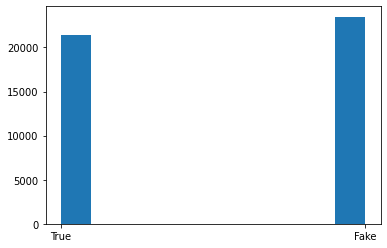

In [7]:
#check to see if classes are balanced
plt.hist(df['class'])

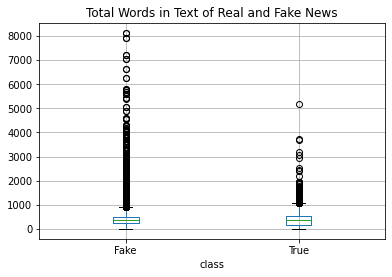

In [8]:
#boxplot of total words in text of real and fake
df.boxplot(column='totalwords',by='class')
plt.title('Total Words in Text of Real and Fake News')
plt.suptitle('') 


plt.show()

In [9]:
df['titlewords'] = [len(x.split()) for x in df['title'].tolist()]

len_true=df['titlewords'][df.category==1].mean()
len_fake=df['titlewords'][df.category==0].mean()

data = {'Type': ['Fake','True'],
        'TextLength': [len_fake,len_true]
        }

dlen = pd.DataFrame(data, columns = ['Type', 'TextLength'])

print (dlen)

   Type  TextLength
0  Fake   14.732805
1  True    9.954475


In [10]:
#create function to remove puncuation and stop words
def process_text(s):

    # Check string to see if they are a punctuation
    nopunc = [char for char in s if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert string to lowercase and remove stopwords
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [11]:
from nltk.corpus import stopwords
import string

In [12]:

#apply function to text field
df['CleanText'] = df['text'].apply(process_text)

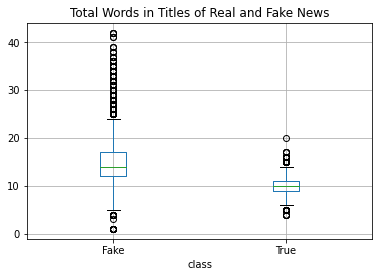

In [13]:
df.boxplot(column='titlewords',by='class')
plt.title('Total Words in Titles of Real and Fake News')
plt.suptitle('') 

plt.show()

In [14]:
import regex as re

import nltk
from nltk.corpus import stopwords

cached_stopwords = stopwords.words('english')
porter = PorterStemmer()

In [15]:
def replace_spec(text):
    regex = r'[^a-zA-z0-9/s]'
    text = re.sub(regex, ' ', text)
    return text

def process_title(title):
  
    title = title.lower()
    title = replace_spec(title)
    #title=re.sub("donald trump","trump ",title)    
  
    title_list = str.split(title)
    
    final_title =[]

    for item in title_list:
        if item not in cached_stopwords:
            final_title.append(item)
    
    return " ".join(final_title)

In [16]:

df['text_final'] = df.text.apply(process_title)

In [17]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
#function to stem sentence
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [19]:
df['t'] = df.text_final.apply(stemSentence)


In [20]:
#apply lemmatization
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
nltk.download('wordnet')
def lemSentence(sentence):
    token_words=word_tokenize(sentence)
    
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lemmatizer.lemmatize(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
#new field with lemmatizer
df['tl'] = df.t.apply(lemSentence)

In [22]:
#check stopwords
print(cached_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
#list of vocabulary after each cleaning phase
no_clean=df.text.tolist()
sw=df.text_final.tolist()
stem=df.t.tolist()
lm=df.tl.tolist()

In [24]:
#no cleaning
cv_1 = CountVectorizer(no_clean)
cv_1_fit=cv_1.fit(no_clean)
nc=len(cv_1_fit.vocabulary_)
print(nc)

122002


In [25]:
#stopwords and punctuation
cv_3 = CountVectorizer(sw)
cv_3_fit=cv_3.fit(sw)
s=len(cv_3_fit.vocabulary_)
print(s)

121919


In [26]:
#stemming
cv_2 = CountVectorizer()
cv_2_fit=cv_1.fit(stem)
st=len(cv_2_fit.vocabulary_)
print(st)

96696


In [27]:
stem=df.t.tolist()

In [28]:
#lemmitization
cv_4 = CountVectorizer(lm)
cv_4_fit=cv_4.fit(lm)
l=len(cv_4_fit.vocabulary_)
print(s)

121919


In [29]:
#vector with vocabulary
data = {'Type': ['None','Stopwords','Stemming','Lemmitization'],
        'VocabularySize': [nc,s,st,l]
        }

dlen = pd.DataFrame(data, columns = ['Type', 'VocabularySize'])

print (dlen)

            Type  VocabularySize
0           None          122002
1      Stopwords          121919
2       Stemming           96696
3  Lemmitization           96491


<BarContainer object of 4 artists>

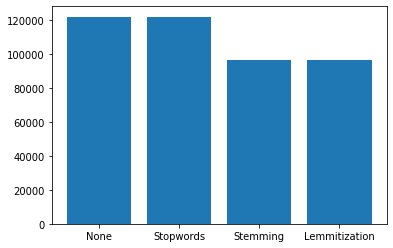

In [30]:
plt.bar(dlen['Type'],dlen['VocabularySize'])


#for index, value in enumerate(x):
   # plt.text(value, index, str(value))


In [31]:
x=dlen['VocabularySize'].values
x

array([122002, 121919,  96696,  96491])

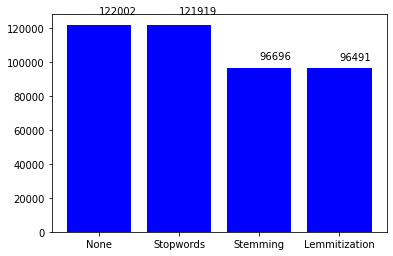

In [32]:
x_pos = [i for i, _ in enumerate(x)]
fig, ax = plt.subplots()

y=dlen['Type'].values
x_pos = [i for i, _ in enumerate(y)]
rects1 = ax.bar(y, x, color='b')
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height, height
              )
autolabel(rects1)

x_pos

In [33]:
#list of true and fake vocab
docs_true = df.t[df.category==1].tolist()
docs_fake = df.t[df.category==0].tolist()

In [34]:
#counts of words in true words
from sklearn.feature_extraction.text import TfidfVectorizer
cv_true = CountVectorizer(docs_true,ngram_range=(1,1))
count_vector_true=cv_true.fit_transform(docs_true)



In [35]:
#counts of words in fake words
from sklearn.feature_extraction.text import TfidfVectorizer
cv_fake = CountVectorizer(docs_fake,ngram_range=(1,1))
count_vector_fake=cv_fake.fit_transform(docs_fake)

In [36]:
#function to sort common terms in vector
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """return n-gram counts in descending order of counts"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    results=[]
    
    # word index, count i
    for idx, count in sorted_items:
        
        # get the ngram name
        n_gram=feature_names[idx]
        
        # collect as a list of tuples
        results.append((n_gram,count))
 
    return results

In [37]:
#print common terms in true news
sorted_items=sort_coo(count_vector_true[0].tocoo())
 
#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=cv_true.get_feature_names()
n_grams=extract_topn_from_vector(feature_names,sorted_items,10)
print(n_grams) 

[('republican', 14), ('tax', 8), ('said', 8), ('trump', 7), ('program', 7), ('hous', 7), ('spend', 6), ('democrat', 6), ('budget', 5), ('want', 4)]


In [38]:
#print common terms in fake news
sorted_items=sort_coo(count_vector_fake[0].tocoo())
 
#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=cv_fake.get_feature_names()
n_grams=extract_topn_from_vector(feature_names,sorted_items,10)
print(n_grams) 

[('year', 18), ('decemb', 13), ('31', 13), ('new', 11), ('trump', 7), ('hater', 6), ('happi', 6), ('wish', 5), ('enemi', 5), ('tweet', 4)]


In [39]:
#term frequency vector with inverse document frequency true
from sklearn.feature_extraction.text import TfidfVectorizer
tf_true = TfidfVectorizer(docs_true,ngram_range=(1,1), use_idf=True)
tf_vector_true=tf_true.fit_transform(docs_true)

In [40]:
#tf idf common terms one grams true
sorted_items=sort_coo(tf_vector_true[0].tocoo())
 
#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=tf_true.get_feature_names()
n_grams=extract_topn_from_vector(feature_names,sorted_items,10)
print(n_grams) 


[('republican', 0.25296116577561806), ('meadow', 0.23128470232107037), ('tax', 0.22426091392924166), ('crowley', 0.22237165988650376), ('discretionari', 0.18586974888107632), ('spend', 0.18358453549257875), ('program', 0.1831457382566679), ('budget', 0.15325943478566115), ('fiscal', 0.14440717238332235), ('cb', 0.14403788736304302)]


In [41]:
#term frequency vector with inverse document frequency fake
from sklearn.feature_extraction.text import TfidfVectorizer
tf_fake = TfidfVectorizer(docs_fake,ngram_range=(1,1))
tf_vectorfake=tf_fake.fit_transform(docs_fake)

In [42]:
#tf idf common terms one grams fake
sorted_items=sort_coo(tf_vectorfake[0].tocoo())
 
#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=tf_fake.get_feature_names()
n_grams=extract_topn_from_vector(feature_names,sorted_items,10)
print(n_grams) 

[('31', 0.4659785429466534), ('decemb', 0.3820029865643018), ('year', 0.25400585633046047), ('hater', 0.25125264053220775), ('happi', 0.18577357612083034), ('new', 0.17029503253793088), ('enemi', 0.16368755042657024), ('wish', 0.1555986889582117), ('dishonest', 0.12281316602649134), ('2018', 0.12130345018704745)]


In [43]:
#term frequency vector with inverse document frequency true bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
tf_true = TfidfVectorizer(docs_true,ngram_range=(1,2))
tf_vector_true=tf_true.fit_transform(docs_true)


In [44]:
#top 10 true bigrams of count vector
sorted_items=sort_coo(tf_vector_true[0].tocoo())
 
#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=tf_true.get_feature_names()
n_grams=extract_topn_from_vector(feature_names,sorted_items,10)
print(n_grams) 

[('republican', 0.13673065850005806), ('crowley said', 0.13524516315976054), ('meadow', 0.12501408883212045), ('tax', 0.12121758825451136), ('crowley', 0.12019640799332222), ('non defens', 0.10464949002754803), ('discretionari', 0.10046638218884886), ('spend', 0.09923117784250433), ('program', 0.098993999005863), ('link issu', 0.09016344210650704)]


In [45]:
#term frequency vector with inverse document frequency fake bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
tf_fake = TfidfVectorizer(docs_fake,ngram_range=(1,2))
tf_vectorfake=tf_fake.fit_transform(docs_fake)

In [46]:
#top 10 fake bigrams of tfidf vector
sorted_items=sort_coo(tf_vectorfake[0].tocoo())
 
#Get feature names (words/n-grams). It is sorted by position in sparse matrix
feature_names=tf_fake.get_feature_names()
n_grams=extract_topn_from_vector(feature_names,sorted_items,10)
print(n_grams) 

[('decemb 31', 0.39659719390658743), ('31', 0.25765641549100615), ('new year', 0.2377421605772577), ('decemb', 0.21122328852872743), ('enemi hater', 0.1593805607563756), ('year', 0.14044903879473783), ('hater', 0.1389266860504137), ('happi new', 0.13163834042260206), ('2018 great', 0.11953542056728171), ('dishonest fake', 0.1134080302247156)]


In [47]:
df.head()

,title,text,subject,date,category,totalwords,class,titlewords,CleanText,text_final,t,tl
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,749,True,10,"[WASHINGTON, Reuters, head, conservative, Repu...",washington reuters head conservative republica...,washington reuter head conserv republican fact...,washington reuter head conserv republican fact...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,624,True,9,"[WASHINGTON, Reuters, Transgender, people, all...",washington reuters transgender people allowed ...,washington reuter transgend peopl allow first ...,washington reuter transgend peopl allow first ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,457,True,10,"[WASHINGTON, Reuters, special, counsel, invest...",washington reuters special counsel investigati...,washington reuter special counsel investig lin...,washington reuter special counsel investig lin...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,376,True,9,"[WASHINGTON, Reuters, Trump, campaign, adviser...",washington reuters trump campaign adviser geor...,washington reuter trump campaign advis georg p...,washington reuter trump campaign advis georg p...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,852,True,11,"[SEATTLEWASHINGTON, Reuters, President, Donald...",seattle/washington reuters president donald tr...,seattle/washington reuter presid donald trump ...,seattle/washington reuter presid donald trump ...
